In [1]:
import numpy as np
import torch
import pandas as pd 
import matplotlib.pyplot as plt

In [115]:
'''
Steps : 
  1. Load train.csv and test.csv containing a 2D dataset (features X and Y) with two different classes
  2. Visualize the dataset and normalize the dimensions of the samples to have zero mean and unit standard deviation
  3. Implement an MLP using Numpy in order to solve a classification problem trying to estimate the classes of the samples
  4. Train the MLP and visualize the decision boundary in 2D of the classification. Plot the training loss for each iteration.
  5. Use the learned MLP to estimate the classes of the data in test.csv. Compute the accuracy in
     training and testing dataset.
'''

'\nSteps : \n  1. Load train.csv and test.csv containing a 2D dataset (features X and Y) with two different classes\n  2. Visualize the dataset and normalize the dimensions of the samples to have zero mean and unit standard deviation\n  3. Implement an MLP using Numpy in order to solve a classification problem trying to estimate the classes of the samples\n  4. Train the MLP and visualize the decision boundary in 2D of the classification. Plot the training loss for each iteration.\n  5. Use the learned MLP to estimate the classes of the data in test.csv. Compute the accuracy in\n     training and testing dataset.\n'

### Step 1

In [40]:
# build a code that loads data from train.csv and test.csv  plots them in 2 separate plots with different colors for each class
def load_data(data_path):
    train = pd.read_csv(data_path+'/train.csv')[['X', 'Y', 'C']]
    test = pd.read_csv(data_path+'/test.csv')[['X', 'Y', 'C']]
    return train,test

def plot_data(train, test, res_path, name):
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.scatter(train['X'],train['Y'],c=train['C'])
    plt.scatter(0,0,c='red')
    plt.title('Train Data')
    plt.show()
    plt.savefig(res_path+f'/train_{name}.png')
    
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.scatter(test['X'],test['Y'],c=test['C'])
    plt.scatter(0,0,c='red')
    plt.title('Test Data')
    plt.show()
    plt.savefig(res_path+f'/test_{name}.png')

### Step 2

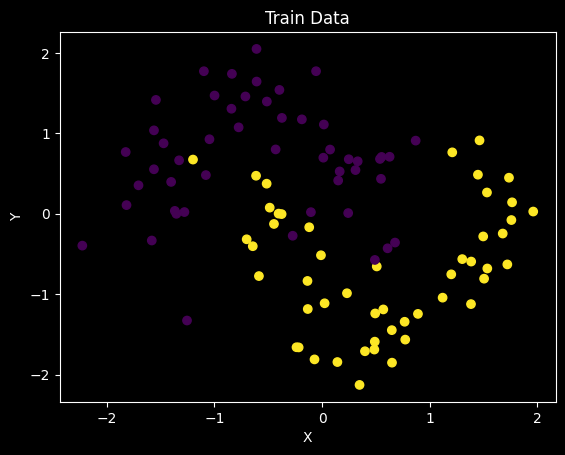

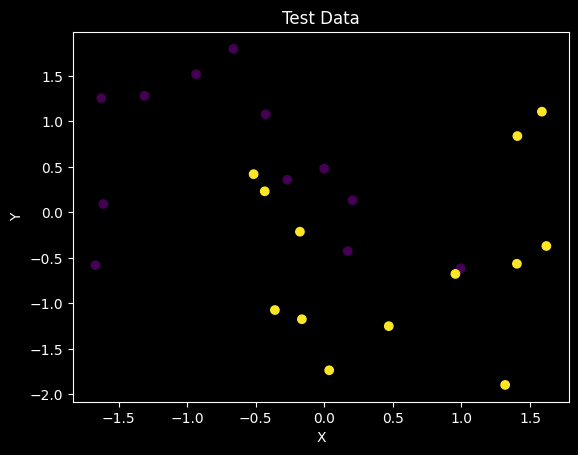

<Figure size 640x480 with 0 Axes>

In [42]:
# 2. Visualize the dataset and normalize the dimensions of the samples to have zero mean and unit standard deviation
train_df, test_df = load_data('data')
plot_data(train_df,test_df, 'Results', "original")
for df in [train_df, test_df]:
    X_mean = np.mean(df.X)
    Y_mean = np.mean(df.Y)
    X_std = np.std(df.X)
    Y_std = np.std(df.Y)
    df['X'] = df['X'].apply(lambda x: (x - X_mean)/ X_std)
    df['Y'] = df['Y'].apply(lambda y: (y - Y_mean)/ Y_std)

plot_data(train_df,test_df, 'Results', "processed")

### Step 3

In [79]:
# 3. Implement an MLP using Numpy in order to solve a classification problem trying to estimate the classes of the samples
# code copied from the P1-Examples.ipynb
class MLP(object):
    def __init__(self,inputNode=2,hiddenNode = 3, outputNode=1):        
        # Define MLP hyper-parameters
        self.inputLayerSize = inputNode # number of input dimensions (x)
        self.outputLayerSize = outputNode # number of output dimensions (y)
        self.hiddenLayerSize = hiddenNode # Dimension of intermediate layer (W_2)
        
        # Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
    def forward(self, X):
        # Compute inputs from outputs
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        # Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    # Derivative of sigmoid and loss with respect their inputs
    def sigmoidPrime(self,z):
        # Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def loss(self, yHat, y):
        # Compute loss for given X,y, use weights already stored in class.
        # J = 0.5*sum((y-yHat)**2)
        J =-sum(y*np.log(yHat)+((1-y)*(np.log(1-yHat))))
        return J
        
    # Derivative of parameters
    def backward(self,X, yHat, y):
        self.yHat = yHat
        # ((-y/yHat)+(1-y)/(1-yHat))
        delta3 = np.multiply((-y/yHat)+(1-y)/(1-yHat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)  
        return dJdW1,dJdW2


def train(NN,X, y,epoch = 10000,lr = .1, verbose = True):
    list_loss = []
    
    for i in range(epoch):
        #Compute derivative with respect to W and W2 for a given X and y:
        yHat = NN.forward(X)
        
        gradW1,gradW2 = NN.backward(X,yHat,y)
        #now update the weight using gradient descent
        NN.W1 -= gradW1 * lr 
        NN.W2 -= gradW2 * lr
        
        if i%1000 == 0 : 
            loss = NN.loss(yHat,y)
            if verbose: print('Loss {}={}'.format(i,loss))
            list_loss.append(loss)
    print('Final Loss value is {}'.format(loss))
        
    return list_loss

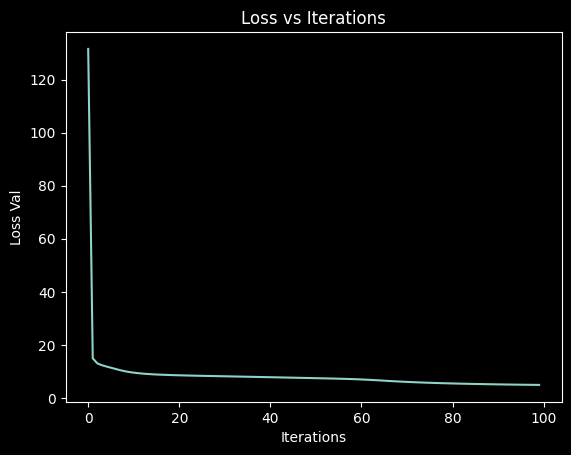

In [66]:
def plot_loss(list_loss, label='Loss vs Iterations', save_path='Results/loss.png'):
    plt.plot(list_loss)
    plt.xlabel('Iterations')
    plt.ylabel('Loss Val')
    plt.title(label)
    plt.savefig(save_path)


x = np.array([train_df['X'],train_df['Y']]).T
y = np.array([train_df['C']]).T
NN_stand = MLP(inputNode=2, hiddenNode=16)
list_loss = train(NN_stand, x, y, epoch=100000, lr=0.01, verbose=False)
plot_loss(list_loss, save_path='Results/standard/loss_1.3.png')

### Step 4

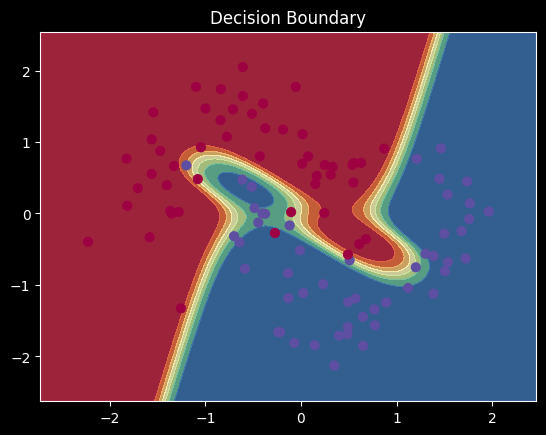

In [63]:
# 4. Plot the decision boundary that separates the two classes produced by the MLP
x_min, x_max = x[:, 0].min() - .5, x[:, 0].max() + .5
y_min, y_max = x[:, 1].min() - .5, x[:, 1].max() + .5

h = 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


Z = NN_stand.forward(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(x[:, 0], x[:, 1], c=y[:,0], s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Decision Boundary')
plt.savefig('Results/standard/decision_boundary_1.4.png')

In [67]:
# 5. Use the MLP model to predict the classes of the samples in the test set and compute the accuracy of the model

for df in [train_df, test_df]:
    x_temp = np.array([df['X'],df['Y']]).T
    Z_raw = NN_stand.forward(x_temp)
    Z = [round(val[0]) for val in Z_raw]
    y_temp = np.array([df['C']]).T
    assert (len(Z)==len(y_temp))
    acc = sum(1 if Z[i]==y_temp[i] else 0 for i in range(len(y_temp)))/len(y_temp)
    if len(df) == len(train_df):
        print(f"The accuracy for the training set is {acc}")
    if len(df) == len(test_df):
        print(f"The accuracy for the testing set is {acc}")

The accuracy for the training set is 0.98
The accuracy for the testing set is 0.96


# Ex. 2

In [124]:
'''
Instead of using the implemented optimizer with standard Gradient Descent, in this exercice you will use SGD with momentum. 
This optimizer tipically accelerates the convergence of the optimization and, thus, it reduce the number of iterations during gradient-descent.
Steps : 
  1. Try to understand how momentum is implemented reading carefully https://ruder.io/optimizing-gradient-descent/index.html#momentum
  2. Modifying OptimSGD in the examples, implement SGD with momentum in a new class call OptimMom. 
  3. Train the MLP implmented in numpy with this new optimizer. 
  4. Use different values for the momentum paramter [0,1] and plot the evolution of the training loss during gradient-descent. Compare the results using the different values and standard gradient descent.
'''


'\nInstead of using the implemented optimizer with standard Gradient Descent, in this exercice you will use SGD with momentum. \nThis optimizer tipically accelerates the convergence of the optimization and, thus, it reduce the number of iterations during gradient-descent.\nSteps : \n  1. Try to understand how momentum is implemented reading carefully https://ruder.io/optimizing-gradient-descent/index.html#momentum\n  2. Modifying OptimSGD in the examples, implement SGD with momentum in a new class call OptimMom. \n  3. Train the MLP implmented in numpy with this new optimizer. \n  4. Use different values for the momentum paramter [0,1] and plot the evolution of the training loss during gradient-descent. Compare the results using the different values and standard gradient descent.\n'

## Sol. 2

In [46]:
# Class implementing gradient-descent with momentum. The key differnece is taht we will add 2 more attributes to the class, a list of velocities and a 
# momentum parameter, which will be used to update the velocities. The velocities will have the same shape as the weights and will be initialized to 0.
class OptimMom(object):
    def __init__(self, learning_rate = .001, weight_list = None, momentum = .9):
        self.lr = learning_rate
        self.v = [np.zeros_like(w) for w in weight_list]
        self.momentum = momentum
    # receive the parameters of the MLP and the computed gradients and update the latter
    def step(self,weight_list,gradient):
        uw = []
        for i, [w, grd] in enumerate(zip(weight_list,gradient)) : 
            # update the velocity using the momentum as the weight given to the previous velocity
            self.v[i] = self.momentum * self.v[i] + self.lr * grd
            uw.append(w - self.v[i])
        return uw

In [78]:
# Same training procedure than befor but using the optimizer class
def train_woptimizer(NN, X, y,epoch = 1,optim = None, verbose = True):
    list_loss = []
    
    for i in range(epoch):
        #Compute derivative with respect to W and W2 for a given X and y:
        yHat = NN.forward(X)
        
        gradW1,gradW2 = NN.backward(X,yHat,y)
        NN.W1, NN.W2 = optim.step([NN.W1,NN.W2],[gradW1,gradW2])
        
        if i%100 == 0 : 
            loss = NN.loss(yHat,y)
            list_loss.append(loss)
            if verbose: print('Loss {}={}'.format(i,loss))
    print('Final Loss value is {}'.format(loss))
    return list_loss

Loss 0=[196.88860466]
Loss 100=[22.56072667]
Loss 200=[18.29171685]
Loss 300=[13.23270284]
Loss 400=[12.50834422]
Loss 500=[12.09288422]
Loss 600=[11.82847815]
Loss 700=[11.6443723]
Loss 800=[11.50578766]
Loss 900=[11.39433386]
Loss 1000=[11.29970709]
Loss 1100=[11.21586683]
Loss 1200=[11.1391493]
Loss 1300=[11.0672824]
Loss 1400=[10.99884719]
Loss 1500=[10.93297153]
Loss 1600=[10.86914814]
Loss 1700=[10.80711967]
Loss 1800=[10.7467988]
Loss 1900=[10.68820614]
Loss 2000=[10.63141766]
Loss 2100=[10.57651987]
Loss 2200=[10.52357418]
Loss 2300=[10.47259295]
Loss 2400=[10.42352821]
Loss 2500=[10.37627196]
Loss 2600=[10.3306649]
Loss 2700=[10.28650998]
Loss 2800=[10.24358704]
Loss 2900=[10.20166644]
Loss 3000=[10.16052025]
Loss 3100=[10.11993092]
Loss 3200=[10.07969767]
Loss 3300=[10.03964121]
Loss 3400=[9.99960718]
Loss 3500=[9.95946877]
Loss 3600=[9.91912842]
Loss 3700=[9.87851866]
Loss 3800=[9.8376016]
Loss 3900=[9.79636708]
Loss 4000=[9.75482925]
Loss 4100=[9.71302201]
Loss 4200=[9.6709

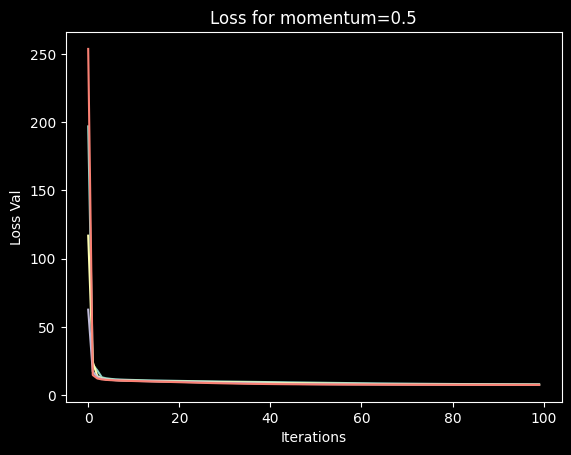

In [60]:
mom_list = [0, 0.25, 0.4, 0.5]
models = [NN_stand]
for i, mom in enumerate(mom_list):
    NN_mom = MLP(inputNode=2, hiddenNode=128)
    optimizer = OptimMom(learning_rate=0.01, weight_list=[NN_mom.W1, NN_mom.W2], momentum=mom)
    list_loss = train_woptimizer(NN_mom, x, y, epoch=10000, optim=optimizer, verbose=False)
    models.append(NN_mom)
    plot_loss(list_loss, label=f'Loss for momentum={mom}', save_path=f'Results/momentum/loss_mom_{mom}.png')

In [69]:
# compare the performance of all these models on the training and testing set
for i, NN_iter in enumerate(models):
    for df in [train_df, test_df]:
        x_temp = np.array([df['X'],df['Y']]).T
        Z_raw = NN_iter.forward(x_temp)
        try:
            Z = [round(val[0]) for val in Z_raw]
        except ValueError:
            print(f"There was an error in the forward propagation for the model with momentum {mom_list[i-1]}")
            continue
        y_temp = np.array([df['C']]).T
        assert (len(Z)==len(y_temp))
        acc = sum(1 if Z[i]==y_temp[i] else 0 for i in range(len(y_temp)))/len(y_temp)
        if i == 0:
            if len(df) == len(train_df):
                print(f"The accuracy for the training set of the model with standard gradient descent is {acc}")
            elif len(df) == len(test_df):
                print(f"The accuracy for the testing set of the model with standard gradient descent is {acc}")
            continue
        if len(df) == len(train_df):
            print(f"The accuracy for the training set of the model with momentum={mom_list[i-1]} is {acc}")
        elif len(df) == len(test_df):
            print(f"The accuracy for the testing set of the model with momentum={mom_list[i-1]} is {acc}")

The accuracy for the training set of the model with standard gradient descent is 0.96
The accuracy for the testing set of the model with standard gradient descent is 0.92
The accuracy for the training set of the model with momentum=0 is 0.96
The accuracy for the testing set of the model with momentum=0 is 0.92
The accuracy for the training set of the model with momentum=0.25 is 0.96
The accuracy for the testing set of the model with momentum=0.25 is 0.92
The accuracy for the training set of the model with momentum=0.4 is 0.96
The accuracy for the testing set of the model with momentum=0.4 is 0.92
The accuracy for the training set of the model with momentum=0.5 is 0.97
The accuracy for the testing set of the model with momentum=0.5 is 0.88


# Ex. 3

In [ ]:
'''
Steps : 
  1. Do the same as Ex. 1 but implementing the MLP using PyTorch.
  2. Train different vesions of the MLP by varying the number of hidden neurons and learing rates
  3. Analyse the results in each case and discuss them.

HINT: Check in https://pytorch.org/docs/stable/nn.html what loss function implemented in PyTorch you have to use in this case.
'''

'\nSteps : \n  1. Do the same as Ex. 1 but implementing the MLP using PyTorch.\n  2. Train different vesions of the MLP by varying the number of hidden neurons and learing rates\n  3. Analyse the results in each case and discuss them.\n\nHINT: Check in https://pytorch.org/docs/stable/nn.html what loss function implemented in PyTorch you have to use in this case.\n'

In [73]:
# DEFINE AN MLP MODULE:
import torch


# This library include many modules implementing NN building blocks and loss functions
import torch.nn as nn 

class MLP_PyTorch(nn.Module):
    def __init__(self, inputNode=2, hiddenNode=3, outputNode=1):   
        super(MLP_PyTorch, self).__init__()     
        #Define Hyperparameters
        self.inputLayerSize = inputNode
        self.outputLayerSize = outputNode
        self.hiddenLayerSize = hiddenNode
        
        # Initialize two modules implementing the two linear layers of the MLP
        self.Linear1 = nn.Linear(self.inputLayerSize, self.hiddenLayerSize) 
        self.Linear2 = nn.Linear(self.hiddenLayerSize, self.outputLayerSize)
        
        self.sigmoid = nn.Sigmoid() # Module implementing the sigmoid funciton
        self.loss = nn.BCELoss() # Module implementing the cross-entropy error loss

    # Define the forward pass of the module using the sub-modules declared in the initializer
    def forward(self, X):
        out = self.Linear1(X) # First Linear Layer   
        out = self.sigmoid(out) # activation function
        out = self.Linear2(out) # Second Linear Layer   
        y_hat = self.sigmoid(out) # final activation function
        return y_hat 

In [77]:


# Function to train our MLP with PyTorch
def train_PyTorch(NN,X, y,epoch = 10000,lr = .01,optimizer = None, verbose = True):
    list_loss = []
    for i in range(epoch):
        # reset optimizer at each epoch
        optimizer.zero_grad()

        # Process the dataset with the forward pass
        yHat = NN.forward(X)
        # and compute the loss function
        loss_val = NN.loss(yHat,y)
        
        # Automatically compute the gradients
        loss_val.backward()
        # Call the optimizer to update the paramters
        optimizer.step()
        
        # Print loss and save the value at each iteration
        if i%500 == 0 : 
            if verbose: print('Loss {}={}'.format(i,loss_val))
        list_loss.append(loss_val.item())
    print('Final Loss value is {}'.format(loss_val))
    return list_loss

## Sol. 3

In [74]:
x_torch = torch.tensor(x, dtype=torch.float32)
y_torch = torch.tensor(y, dtype=torch.float32)

Loss 19999=0.6679965257644653
Loss 19999=0.3338150084018707
Loss 19999=0.08255007117986679
Loss 19999=0.06435997784137726
Loss 19999=3.1925432682037354
Loss 19999=0.5129749774932861
Loss 19999=0.21669478714466095
Loss 19999=0.011102472431957722
Loss 19999=0.0007571054738946259
Loss 19999=5.034457683563232
Loss 19999=0.3718312382698059
Loss 19999=0.17991499602794647
Loss 19999=0.013298767618834972
Loss 19999=0.0005249468958936632
Loss 19999=50.0
Loss 19999=0.3378235697746277
Loss 19999=0.13741260766983032
Loss 19999=0.00959128700196743
Loss 19999=50.0
Loss 19999=50.0
Loss 19999=0.3290867507457733
Loss 19999=0.09786553680896759
Loss 19999=0.008925308473408222
Loss 19999=50.0
Loss 19999=50.0
Loss 19999=0.32670292258262634
Loss 19999=0.0906488448381424
Loss 19999=0.00716833770275116
Loss 19999=50.0
Loss 19999=50.0
Loss 19999=0.31867465376853943
Loss 19999=0.08709576725959778
Loss 19999=50.0
Loss 19999=50.0
Loss 19999=50.0


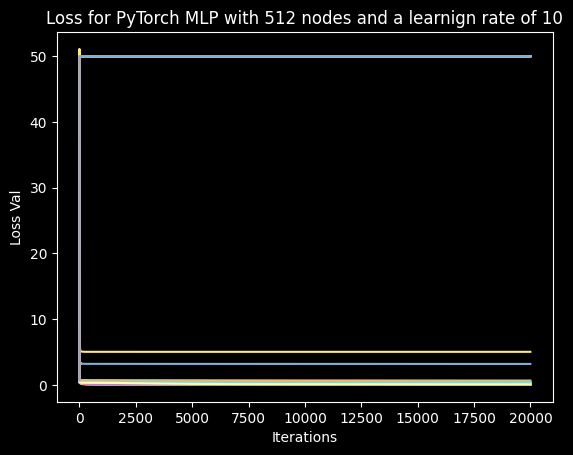

In [76]:
# try for different hidden nodes and learning rates (takes about 10 minutes to run)
nodes_list = [4, 16, 32, 64, 128, 256, 512]
lr_list = [0.001, 0.01, 0.1, 1, 10]
models = []
for nodes in nodes_list:
    for lr in lr_list:
        print("-----------------------------Training MLP with {} hidden nodes and a learning rate of {}-----------------------------".format(nodes, lr))
        NN_torch = MLP_PyTorch(hiddenNode=nodes)
        optimizer = torch.optim.Adagrad(NN_torch.parameters(), lr=lr) 
        #Train MLP using Pytorch:
        list_loss = train_PyTorch(NN_torch,x_torch,y_torch, epoch = 20000, optimizer = optimizer, verbose=False)
        plot_loss(list_loss, label=f'Loss for PyTorch MLP with {nodes} nodes and a learnign rate of {lr}', 
                save_path=f'Results/pytorch/loss_HN{nodes}_lr{lr}.png')
        models.append(NN_torch)

In [80]:
for i, NN in enumerate(models):
    for df in [train_df, test_df]:
        x_temp = torch.tensor(np.array([df['X'],df['Y']]).T, dtype=torch.float32)
        Z_raw = NN.forward(x_temp)
        try:
            Z = [torch.round(val[0]) for val in Z_raw]
        except ValueError:
            continue
        y_temp = torch.tensor(np.array([df['C']]).T, dtype=torch.float32)
        assert (len(Z)==len(y_temp))
        acc = sum(1 if Z[i]==y_temp[i] else 0 for i in range(len(y_temp)))/len(y_temp)
        if len(df) == len(train_df):
            print(f"The accuracy using the training set for the model with {NN.hiddenLayerSize} hidden nodes and {lr_list[i%5]} is {acc}")
        elif len(df) == len(test_df):
            print(f"The accuracy using the training set for the model with {NN.hiddenLayerSize} hidden nodes and {lr_list[i%5]} is {acc}")

The accuracy using the training set for the model with 4 hidden nodes and 0.001 is 0.8
The accuracy using the training set for the model with 4 hidden nodes and 0.001 is 0.68
The accuracy using the training set for the model with 4 hidden nodes and 0.01 is 0.83
The accuracy using the training set for the model with 4 hidden nodes and 0.01 is 0.8
The accuracy using the training set for the model with 4 hidden nodes and 0.1 is 0.97
The accuracy using the training set for the model with 4 hidden nodes and 0.1 is 0.92
The accuracy using the training set for the model with 4 hidden nodes and 1 is 0.97
The accuracy using the training set for the model with 4 hidden nodes and 1 is 0.88
The accuracy using the training set for the model with 4 hidden nodes and 10 is 0.89
The accuracy using the training set for the model with 4 hidden nodes and 10 is 0.76
The accuracy using the training set for the model with 16 hidden nodes and 0.001 is 0.85
The accuracy using the training set for the model wit

(10000, 2)
(10000, 1)


TypeError: Input z must be at least a (2, 2) shaped array, but has shape (10000, 1)

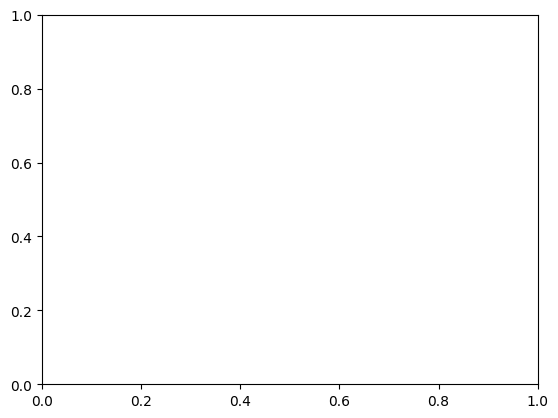

In [143]:
# Plot the decision boundary of the best model!!!
x1 = np.linspace(-1,1,100)
x2 = np.linspace(-1,1,100)
X1, X2 = np.meshgrid(x1,x2)
X1 = X1.reshape(-1,1)
X2 = X2.reshape(-1,1)
X = np.concatenate((X1,X2),axis=1)
print(X.shape)
X_torch = torch.tensor(X, dtype=torch.float32)
Z = NN.forward(X_torch)
Z = Z.detach().numpy()
print(Z.shape)
Z = Z.reshape(X1.shape)
plt.contourf(X1,X2,Z,levels=1,colors=['red','blue'],alpha=0.3)
plt.scatter(x[y==0,0],x[y==0,1],c='red',label='Class 0')
plt.scatter(x[y==1,0],x[y==1,1],c='blue',label='Class 1')
plt.legend()
plt.show()

"""
#Plot the decision boundary
x_min, x_max = x[:, 0].min() - .5, x[:, 0].max() + .5
y_min, y_max = x[:, 1].min() - .5, x[:, 1].max() + .5

h = 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


Z = NN.forward(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(x[:, 0], x[:, 1], c=y[:,0], s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
"""